### Data Simulating Module <br>
&emsp; -- dummy data for sanity check of Deep Reinforcement learning algorithms and environments <br>
&emsp; &emsp; -- based on input parameters, create "good" and "bad" data <br>
&emsp; -- simulated data based on calibrated distribution function to enrich datasets <br>
&emsp; &emsp; -- 

##### Dummy data simulation <br>
Stochastic differential equation for the process is: <br>

&emsp; $\frac{dP_{t}}{P_{t}} = µdt + σdW_{t}$ <br>

Closed-form integraion of the SDE: <br>

&emsp; St = $S_{0}exp(\int_{0}^{t}[\mu - \frac{1}{2}\sigma^2]ds + \int_{0}^{t}\sigma dW_{s})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DataSimulator():
    '''
    Simulate fake data for sanity check of deep reinforcement learning algorithms and environments.
    
    Parameters
    ----------
    SO : float, default=100
        Initial stock price
    mu : float, defaul=0.02
        Average return
    sigma : float, default=0.05
        Standatd deviation (volatility)
    N : int, default=1
        Number of stocks/simulated trajectiories
    days : int, default=252
        Length of simulated trajectiories
    plot : bool, default=True 

    '''
    def __init__(self, S0=100., mu=0.02, sigma=0.05, N=5, days=252*1, plot=True, name_prefix='fake'):
        self.S0 = S0
        self.mu = mu
        self.sigma = sigma
        self.N = N
        self.days = days
        self.T = 1
        self.dt = self.T / self.days
        self.plot = plot
        self.name_prefix = name_prefix

        self.S, self.names = self.simulate_dummies()

    def simulate_dummies(self):
        S = np.zeros((self.days+1, self.N))
        S[0] = self.S0

        for t in range(1, self.days+1):
            W = np.random.normal(size=self.N) # random part of the stochastic equation (wiener process)
            S[t] = S[t-1] * np.exp((self.mu - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * W)

        if self.plot:
            plt.figure(figsize=(15, 10))
            plt.plot(S)
            plt.show()

        captions = [ f'{self.name_prefix}_{i+1}' for i in range(self.N)]

        return S, captions


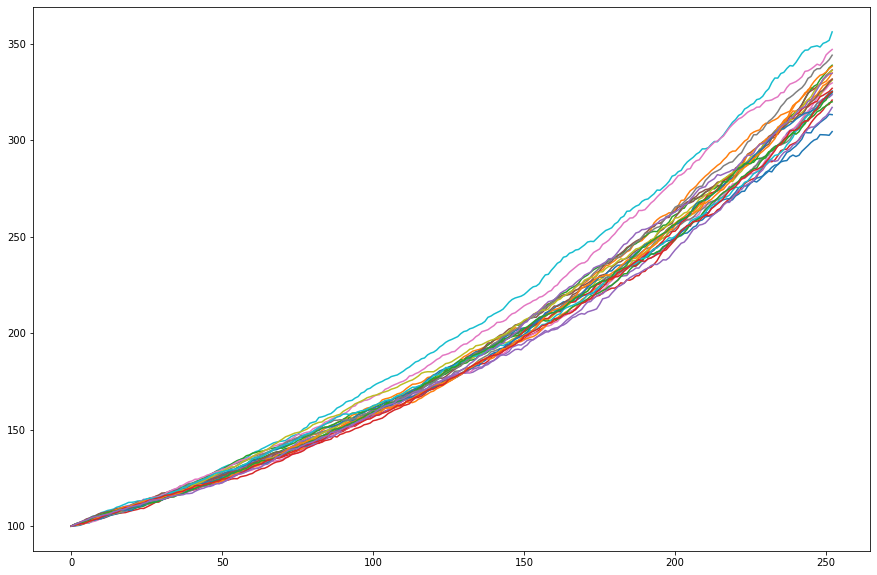

In [2]:
good_stocks = DataSimulator(mu=1.18, sigma=0.04, N=25)

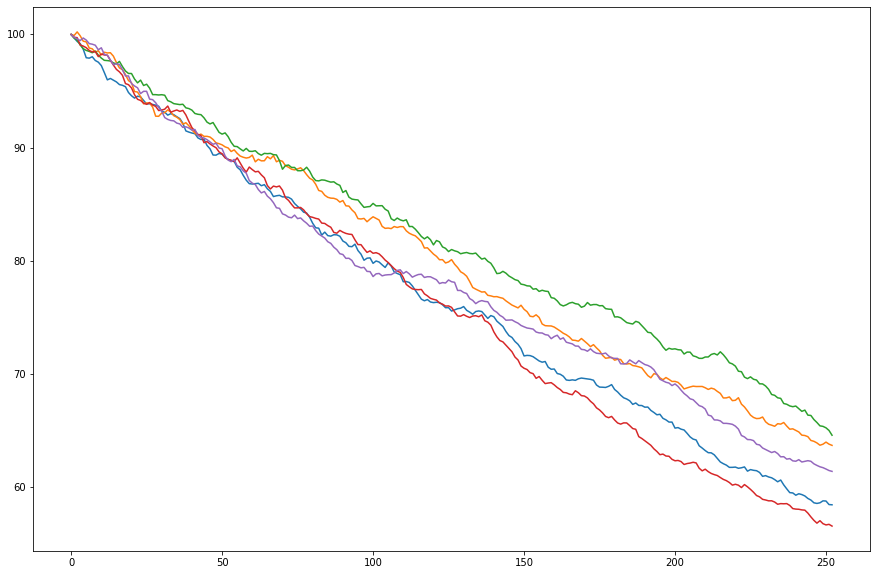

In [4]:
bad_stocks = DataSimulator(mu=-0.50, sigma=0.04, N=5)

In [97]:
good_stocks.names

['fake_1', 'fake_2', 'fake_3', 'fake_4', 'fake_5']

In [102]:
bad_stocks.names

['fake_1', 'fake_2', 'fake_3', 'fake_4', 'fake_5']